## Statistical Hypothesis Testing

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### One sample t-test - comparing continuous measurements to a baseline

In [3]:
# First we sample 10 values from the normal distribution (mean=0,std=1)

sample_size = 10
V = np.random.randn(sample_size) 

# This is the baseline value we will compare with
baseline = 0 

# What p-value (1-confidence) is needed to include the baseline in the confidence interval? 
p_value = stats.ttest_1samp(V,baseline)[1] 

print("p value: {:.3f}".format(p_value))

# Here we do statistical hypothesis testing using an alpha (1-confidence) of 0.05

confidence = 0.95

if p_value < 1-confidence: 
    print("The null hypothesis, i.e., the population mean equals the baseline, is rejected!")
else:
    print("The null hypothesis cannot be rejected!")


p value: 0.642
The null hypothesis cannot be rejected!


In [4]:
# If we repeat the above a large number of times, we should expect a type I error,
# i.e., incorrectly rejecting the null hypothesis, to be made a fraction of times corresponding to 1-confidence

no_iterations = 10000
sample_size = 10

errors = 0
for i in range(no_iterations):
    V = np.random.randn(sample_size) 
    p_value = stats.ttest_1samp(V,baseline)[1] 
    if p_value < 1-confidence:
        errors += 1

print("Fraction of errors: {:.3f}".format(errors/no_iterations))

Fraction of errors: 0.050


In [155]:
# Since we are sampling from the normal distribution, this should hold independently of the sample size
# Let us calculate the observed type I error rates for several sample sizes

sample_sizes = [2,5,10,15,20,25,30,50,75,100]
no_iterations = 1000

type_I_errors = np.empty(len(sample_sizes))

for (t,sample_size) in enumerate(sample_sizes):
    V = np.random.randn(no_iterations,sample_size)
    p_values = np.apply_along_axis(stats.ttest_1samp,1,V,baseline)[:,1]
    type_I_errors[t] = np.sum(p_values < 1-confidence)/no_iterations

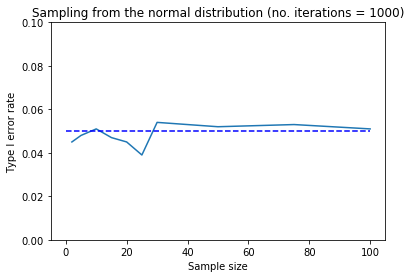

In [156]:
# ... and plot them!

plt.plot(sample_sizes,type_I_errors)
plt.plot([0,100],[0.05,0.05],"b--")
plt.title("Sampling from the normal distribution (no. iterations = " + str(no_iterations)+")")
plt.ylabel("Type I error rate")
plt.xlabel("Sample size")
plt.ylim(0,0.1)
#plt.savefig("sampling from normal distribution")
plt.show()

In [8]:
# But what if the underlying distribution is not normal?
# Let us repeat the above, but now sampling from the uniform distribution, still with a population mean of 0

no_iterations = 10000
sample_size = 2

errors = 0
for i in range(no_iterations):
    V = np.random.rand(sample_size)-0.5 
    p_value = stats.ttest_1samp(V,baseline)[1] 
    if p_value < 1-confidence:
        errors += 1

print("Fraction of errors: {:.3f}".format(errors/no_iterations))

Fraction of errors: 0.071


In [9]:
# Above, we can see more incorrectly rejected hypotheses than expected, i.e., the confidence intervals are too narrow!
# But what happens if we increase the sample size to e.g. 30?

no_iterations = 10000
sample_size = 30

errors = 0
for i in range(no_iterations):
    V = np.random.rand(sample_size)-0.5 
    p_value = stats.ttest_1samp(V,baseline)[1] 
    if p_value < 1-confidence:
        errors += 1

print("Fraction of errors: {:.3f}".format(errors/no_iterations))

Fraction of errors: 0.055


In [161]:
# Much better!
# Let us calculate the observed type I error rates for several sample sizes

sample_sizes = [2,5,10,15,20,25,30,50,75,100]
no_iterations = 10000

type_I_errors = np.empty(len(sample_sizes))

for (t,sample_size) in enumerate(sample_sizes):
    V = np.random.rand(no_iterations,sample_size)-0.5
    p_values = np.apply_along_axis(stats.ttest_1samp,1,V,baseline)[:,1]
    type_I_errors[t] = np.sum(p_values < 1-confidence)/no_iterations

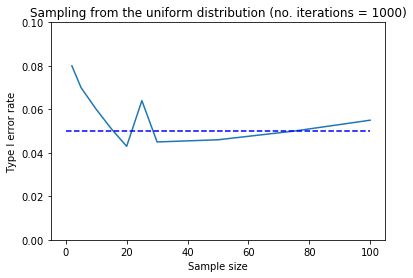

In [162]:
# ... and plot them!

plt.plot(sample_sizes,type_I_errors)
plt.plot([0,100],[0.05,0.05],"b--")
plt.title("Sampling from the uniform distribution (no. iterations = " + str(no_iterations)+")")
plt.ylabel("Type I error rate")
plt.xlabel("Sample size")
plt.ylim(0,0.1)
#plt.savefig("sampling from uniform distribution")
plt.show()

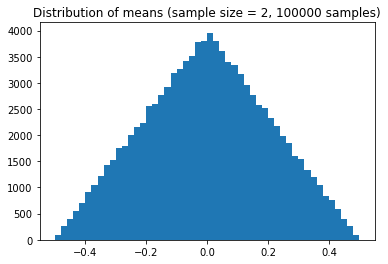

In [7]:
# Let us take a look at how the sample means are distributed for a very small sample size

small_sample_size = 2
no_samples = 100000

small_sample_uniform = np.random.rand(no_samples,small_sample_size)-0.5
plt.hist(np.mean(small_sample_uniform,1),bins=50)
plt.title("Distribution of means (sample size = "+str(small_sample_size)+", "+str(no_samples)+" samples)")

plt.savefig("small-sample-mean-from-uniform-distribution")

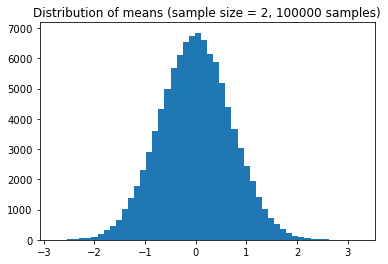

In [8]:
# Hmm... not so normal; compare to the shape of the normal distribution below.

small_sample_size = 2
no_samples = 100000

small_sample_normal = np.random.randn(no_samples,small_sample_size)
plt.hist(np.mean(small_sample_normal,1),bins=50)
plt.title("Distribution of means (sample size = "+str(small_sample_size)+", "+str(no_samples)+" samples)")
plt.savefig("small-sample-mean-from-normal-distribution")

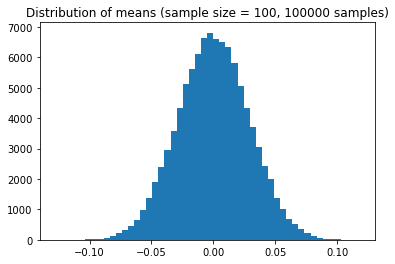

In [9]:
# However, for larger sample sizes, the distribution tend to be more normal

larger_sample_size = 100
no_samples = 100000

larger_sample_uniform = np.random.rand(no_samples,larger_sample_size)-0.5
plt.hist(np.mean(larger_sample_uniform,1),bins=50);
plt.title("Distribution of means (sample size = "+str(larger_sample_size)+", "+str(no_samples)+" samples)")

plt.savefig("larger-sample-mean-from-uniform-distribution")

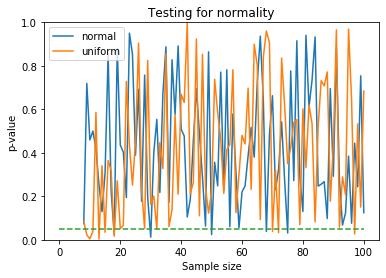

In [12]:
# We may actually test if a sample of means is drawn from the normal distribution

no_samples = 10000
sample_sizes = range(8,101)

p_values_normal = [stats.normaltest(np.mean(np.random.randn(no_samples,sample_size),1)).pvalue for sample_size in sample_sizes]
p_values_uniform = [stats.normaltest(np.mean(np.random.rand(no_samples,sample_size)-0.5,1)).pvalue for sample_size in sample_sizes]

plt.plot(sample_sizes,p_values_normal,label="normal")
plt.plot(sample_sizes,p_values_uniform,label="uniform")
plt.plot([0,100],[0.05,0.05],"--")
plt.title("Testing for normality")
plt.ylabel("p-value")
plt.xlabel("Sample size")
plt.legend()
plt.ylim(0,1)
plt.savefig("testing-for-normality")
plt.show()

### Paired t-test - comparing continuous measurements to those of a baseline method

In [111]:
# First we sample 10 values from the normal distribution (mean=100,std=5)
# These may e.g. be the observed absolute errors of the chosen model on the test set

sample_size = 10
V = 5*np.random.randn(sample_size)+100

# Below we generate the baseline values we will compare with, i.e., the observed absolute errors 
# of the baseline model on the test set (hence we have the same number of observations)
# In this test, we assume that they have the same mean and standard deviation

B = 5*np.random.randn(sample_size)+100

# What p-value (1-confidence) is needed to include the zero in the confidence interval for the paired differences? 
p_value = stats.ttest_rel(V,B)[1] 

print("p value: {:.3f}".format(p_value))

# Here we do statistical hypothesis testing using an alpha (1-confidence) of 0.05

confidence = 0.95

if p_value < 1-confidence: 
    print("The null hypothesis, i.e., the population mean equals the baseline, is rejected!")
else:
    print("The null hypothesis cannot be rejected!")

p value: 0.314
The null hypothesis cannot be rejected!


In [112]:
# Let us calculate the observed type I error rates for several sample sizes

sample_sizes = [2,5,10,15,20,25,30,50,75,100]
no_iterations = 100000

type_I_errors = np.empty(len(sample_sizes))

for (t,sample_size) in enumerate(sample_sizes):
    errors = 0
    for i in range(no_iterations):
        V = 5*np.random.randn(sample_size)+100
        B = 5*np.random.randn(sample_size)+100
        p_value = stats.ttest_rel(V,B)[1]
        if p_value < 1-confidence:
            errors += 1
    type_I_errors[t] = errors/no_iterations

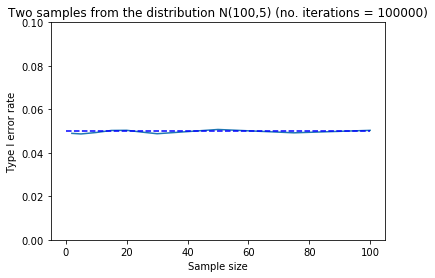

In [113]:
# ... and plot them!

plt.plot(sample_sizes,type_I_errors)
plt.plot([0,100],[0.05,0.05],"b--")
plt.title("Two samples from the distribution N(100,5) (no. iterations = " + str(no_iterations)+")")
plt.ylabel("Type I error rate")
plt.xlabel("Sample size")
plt.ylim(0,0.1)
plt.savefig("two-samples-from-normal-distribution")
plt.show()

In [114]:
# Let us calculate the observed type II error rates,
# i.e., incorrectly not rejecting the null hypothesis,
# for several sample sizes

sample_sizes = [2,5,10,15,20,25,30,50,75,100]
differences = [1,2,3,4,5]
no_iterations = 10000

type_II_errors = np.empty((len(sample_sizes),len(differences)))

for (t,sample_size) in enumerate(sample_sizes):
    for (d,difference) in enumerate(differences): 
        errors = 0
        for i in range(no_iterations):
            V = 5*np.random.randn(sample_size)+100
            B = 5*np.random.randn(sample_size)+100-difference 
            p_value = stats.ttest_rel(V,B)[1]
            if p_value > 1-confidence:
                errors += 1
        type_II_errors[t,d] = errors/no_iterations

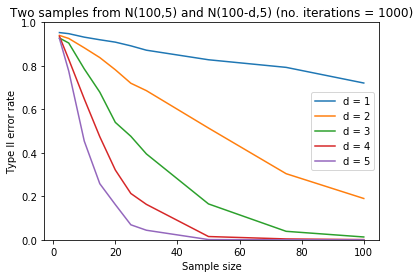

In [115]:
# ... and plot them!

for (d,difference) in enumerate(differences):
    plt.plot(sample_sizes,type_II_errors[:,d],label="d = "+str(difference))
plt.title("Two samples from N(100,5) and N(100-d,5) (no. iterations = " + str(no_iterations)+")")
plt.ylabel("Type II error rate")
plt.xlabel("Sample size")
plt.ylim(0,1)
plt.legend()
plt.savefig("type-II-errors-two-samples-distribution")
plt.show()

### The Binomial test

In [24]:
# Assume some baselevel accuracy that we wish to compare with

baselevel = 0.75

# Assume that the true model accuracy is the same as the baselevel

true_accuracy = 0.75

# We choose some level of confidence

confidence = 0.95

# Now we consider test sets of various sizes, and investigate if
# the observed frequencies of correct and incorrect predictions deviate
# significantly from the expected, assuming the baselevel accuracy

sample_sizes = [2,5,10,15,20,25,30,50,75,100]
no_samples = 10000

type_I_errors = np.empty(len(sample_sizes))

for (t,sample_size) in enumerate(sample_sizes):
    V = np.sum(np.random.choice([0,1],size=(no_samples,sample_size),p=[1-true_accuracy,true_accuracy]),1)
    p_values = np.array([stats.binom_test(v,n=sample_size,p=baselevel) for v in V])
    type_I_errors[t] = np.sum(p_values < 1-confidence)/no_samples

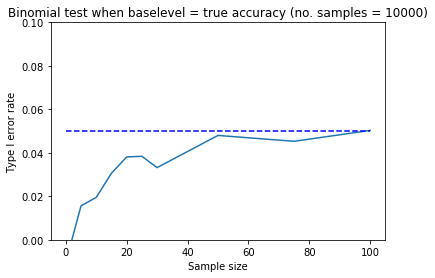

In [26]:
# ... and plot the type I errors!

plt.plot(sample_sizes,type_I_errors)
plt.plot([0,100],[0.05,0.05],"b--")
plt.title("Binomial test when baselevel = true accuracy (no. samples = " + str(no_samples)+")")
plt.ylabel("Type I error rate")
plt.xlabel("Sample size")
plt.ylim(0,0.1)
plt.savefig("binomial-test-same-accuracy")
plt.show()

In [30]:
# Now we look at type II errors, i.e., failure to detect differences
# from the baselevel accuracy

sample_sizes = [2,5,10,15,20,25,30,50,75,100]
no_samples = 10000
true_accuracies = [0.69,0.72,0.78,0.81]

type_II_errors = np.empty((len(true_accuracies),len(sample_sizes)))

for (a,true_accuracy) in enumerate(true_accuracies):
    for (t,sample_size) in enumerate(sample_sizes):
        V = np.sum(np.random.choice([0,1],size=(no_samples,sample_size),p=[1-true_accuracy,true_accuracy]),1)
        p_values = np.array([stats.binom_test(v,n=sample_size,p=baselevel) for v in V])
        type_II_errors[a,t] = np.sum(p_values > 1-confidence)/no_samples

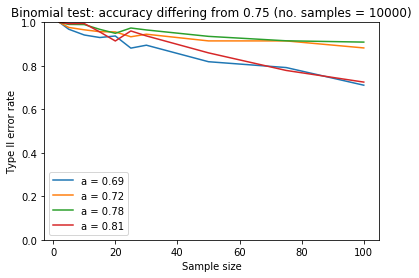

In [33]:
# Let us plot them!

for (a,true_accuracy) in enumerate(true_accuracies):
    plt.plot(sample_sizes,type_II_errors[a,:],label="a = "+str(true_accuracy))
plt.title("Binomial test: accuracy differing from 0.75 (no. samples = " + str(no_samples)+")")
plt.ylabel("Type II error rate")
plt.xlabel("Sample size")
plt.ylim(0,1)
plt.legend()
plt.savefig("type-II-errors-binomial")
plt.show()

### Comparing multiple algorithms over multiple datasets using the Friedman test

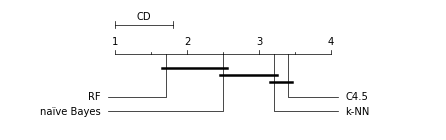

In [13]:
import Orange # assumes Orange has been installed, e.g., at the commandline by "conda install orange3"
import matplotlib.pyplot as plt
algorithms = ["RF","k-NN","naïve Bayes","C4.5"]
no_datasets = 34
average_ranks =  [1.7,3.2,2.5,3.4]
cd = Orange.evaluation.compute_CD(average_ranks,no_datasets) # test='nemenyi' by default
Orange.evaluation.graph_ranks(average_ranks,algorithms,cd=cd,width=6,textspace=1.5)
plt.show()